# EDA for Enhanced Molecular Data


## Labeled Data

In [1]:
# Step 1: Import necessary libraries and load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the enhanced molecular data
df_labeled = pd.read_csv('../../data/raw/enhanced_data/ct_tox/labeled_features.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df_labeled.shape}")
df_labeled.head()

Dataset loaded successfully!
Shape: (222, 40)


,smiles,FDA_APPROVED,CT_TOX,canonical_smiles,MolWt,LogP,NumHDonors,NumHAcceptors,NumRotatableBonds,NumAromaticRings,...,HallKierAlpha,NumSaturatedCarbocycles,NumAromaticCarbocycles,NumSaturatedHeterocycles,NumAromaticHeterocycles,fr_NH2,fr_COO,fr_benzene,fr_furan,fr_halogen
0,C1=CC(=C2C(=C1NCCNCCO)C(=O)C3=C(C=CC(=C3C2=O)O...,0,1,O=C1c2c(O)ccc(O)c2C(=O)c2c(NCCNCCO)ccc(NCCNCCO...,444.488,-0.1392,8.0,10.0,12.0,2.0,...,-3.18,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1,CCCCCOC(=O)NC1=NC(=O)N(C=C1F)[C@H]2[C@@H]([C@@...,0,1,CCCCCOC(=O)Nc1nc(=O)n([C@@H]2O[C@H](C)[C@@H](O...,359.354,0.7602,3.0,8.0,6.0,1.0,...,-2.04,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,C(C(=O)[O-])[NH3+],1,0,[NH3+]CC(=O)[O-],75.067,-3.0218,1.0,2.0,1.0,0.0,...,-0.57,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,CC1([C@@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)C(c3cc...,1,0,CC1(C)S[C@@H]2[C@H](NC(=O)C(C(=O)[O-])c3ccccc3...,376.390,-2.1829,1.0,7.0,5.0,1.0,...,-2.55,0.0,1.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0
4,CC[C@H](C)[C@H]1C(=O)N[C@H](C(=O)N[C@H](C(=O)N...,1,0,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...,1008.215,-4.3254,12.0,14.0,17.0,1.0,...,-6.15,0.0,1.0,2.0,0.0,3.0,0.0,1.0,0.0,0.0


In [2]:
# Step 2: Display and understand each feature
print("="*80)
print("COLUMN NAMES AND DATA TYPES")
print("="*80)
print(df_labeled.dtypes)
print("\n" + "="*80)
print("FEATURE DESCRIPTIONS")
print("="*80)

# Group features by category
molecular_ids = ['smiles', 'canonical_smiles']
targets = ['FDA_APPROVED', 'CT_TOX']
basic_props = ['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors', 'NumRotatableBonds', 'TPSA']
lipinski_features = ['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors', 'NumHeteroatoms']
druglikeness = ['QED', 'TPSA', 'MolMR']
structural = ['NumRings', 'NumAromaticRings', 'NumAliphaticRings', 'NumSaturatedRings', 
              'NumSaturatedCarbocycles', 'NumAromaticCarbocycles', 
              'NumSaturatedHeterocycles', 'NumAromaticHeterocycles']
topological = ['BertzCT', 'Chi0v', 'Chi1v', 'Kappa1', 'Kappa2', 'BalabanJ', 'HallKierAlpha']
electronic = ['NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge']
surface = ['LabuteASA', 'PEOE_VSA1', 'PEOE_VSA2']
pharmacophore = ['fr_NH2', 'fr_COO', 'fr_benzene', 'fr_furan', 'fr_halogen']

print(f"\nMolecular Identifiers: {molecular_ids}")
print(f"Target Variables: {targets}")
print(f"Basic Properties: {basic_props}")
print(f"Lipinski Features: {lipinski_features}")
print(f"Drug-likeness: {druglikeness}")
print(f"Structural: {structural}")
print(f"Topological: {topological}")
print(f"Electronic: {electronic}")
print(f"Surface Area: {surface}")
print(f"Pharmacophore: {pharmacophore}")

COLUMN NAMES AND DATA TYPES
smiles                       object
FDA_APPROVED                  int64
CT_TOX                        int64
canonical_smiles             object
MolWt                       float64
LogP                        float64
NumHDonors                  float64
NumHAcceptors               float64
NumRotatableBonds           float64
NumAromaticRings            float64
NumHeteroatoms              float64
TPSA                        float64
NumRings                    float64
NumAliphaticRings           float64
NumSaturatedRings           float64
FractionCsp3                float64
NumValenceElectrons         float64
MaxPartialCharge            float64
MinPartialCharge            float64
LabuteASA                   float64
PEOE_VSA1                   float64
PEOE_VSA2                   float64
QED                         float64
BertzCT                     float64
Chi0v                       float64
Chi1v                       float64
Kappa1                      float64


In [3]:
# Step 3: Display a summary of the dataset
print("="*80)
print("DATASET SUMMARY STATISTICS")
print("="*80)
print(df_labeled.describe())

print("\n" + "="*80)
print("TARGET VARIABLES SUMMARY")
print("="*80)
print(df_labeled[['FDA_APPROVED', 'CT_TOX']].describe())

DATASET SUMMARY STATISTICS
       FDA_APPROVED      CT_TOX        MolWt        LogP  NumHDonors  \
count    222.000000  222.000000   222.000000  222.000000  222.000000   
mean       0.576577    0.504505   409.332495    1.814318    2.432432   
std        0.495218    0.501110   230.403410    3.023466    2.699494   
min        0.000000    0.000000    75.067000  -11.291400    0.000000   
25%        0.000000    0.000000   273.275250    0.273350    1.000000   
50%        1.000000    1.000000   364.871500    2.397350    2.000000   
75%        1.000000    1.000000   481.014000    3.553950    3.000000   
max        1.000000    1.000000  1882.332000   12.605800   21.000000   

       NumHAcceptors  NumRotatableBonds  NumAromaticRings  NumHeteroatoms  \
count     222.000000         222.000000        222.000000      222.000000   
mean        5.671171           5.801802          1.720721        7.945946   
std         3.606803           5.490955          1.288102        5.126169   
min         0.00

In [4]:
# Step 4: Check for missing values
print("="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

missing_counts = df_labeled.isnull().sum()
missing_percentages = (df_labeled.isnull().sum() / len(df_labeled)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Percentage': missing_percentages
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
    
    # Visualize missing values
    plt.figure(figsize=(10, 6))
    plt.barh(missing_df.index, missing_df['Percentage'])
    plt.xlabel('Percentage Missing (%)')
    plt.title('Missing Values by Feature')
    plt.tight_layout()
    plt.show()
else:
    print("✓ No missing values found in the dataset!")

MISSING VALUES ANALYSIS
✓ No missing values found in the dataset!


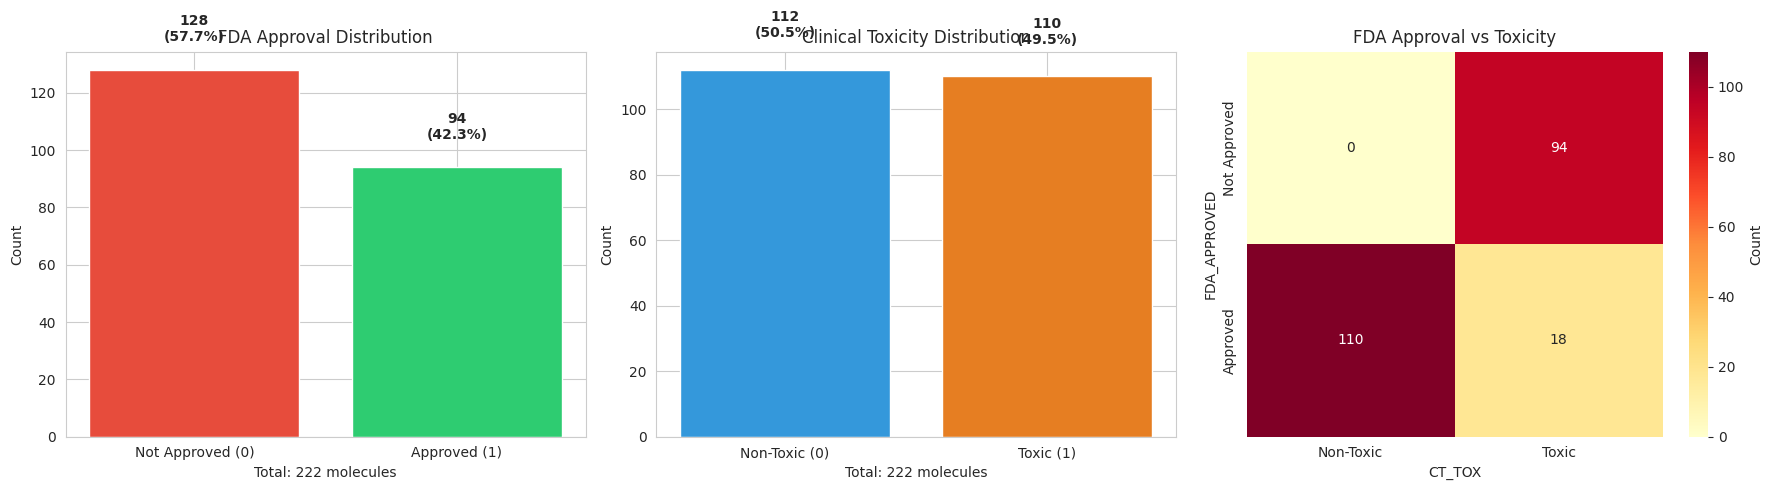

CLASS BALANCE ANALYSIS

FDA_APPROVED:
FDA_APPROVED
1    0.576577
0    0.423423
Name: proportion, dtype: float64
Imbalance ratio: 15.32%
Status: BALANCED

CT_TOX:
CT_TOX
1    0.504505
0    0.495495
Name: proportion, dtype: float64
Imbalance ratio: 0.90%
Status: BALANCED

Cross-tabulation:
CT_TOX          0    1  All
FDA_APPROVED               
0               0   94   94
1             110   18  128
All           110  112  222


In [5]:
# Step 5: Plot distribution of target variables and check balance
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# FDA_APPROVED distribution
fda_counts = df_labeled['FDA_APPROVED'].value_counts()
axes[0].bar(['Not Approved (0)', 'Approved (1)'], fda_counts.values, color=['#e74c3c', '#2ecc71'])
axes[0].set_ylabel('Count')
axes[0].set_title('FDA Approval Distribution')
axes[0].set_xlabel(f'Total: {len(df_labeled)} molecules')
for i, v in enumerate(fda_counts.values):
    axes[0].text(i, v + 10, f'{v}\n({v/len(df_labeled)*100:.1f}%)', ha='center', fontweight='bold')

# CT_TOX distribution
tox_counts = df_labeled['CT_TOX'].value_counts()
axes[1].bar(['Non-Toxic (0)', 'Toxic (1)'], tox_counts.values, color=['#3498db', '#e67e22'])
axes[1].set_ylabel('Count')
axes[1].set_title('Clinical Toxicity Distribution')
axes[1].set_xlabel(f'Total: {len(df_labeled)} molecules')
for i, v in enumerate(tox_counts.values):
    axes[1].text(i, v + 10, f'{v}\n({v/len(df_labeled)*100:.1f}%)', ha='center', fontweight='bold')

# Cross-tabulation
cross_tab = pd.crosstab(df_labeled['FDA_APPROVED'], df_labeled['CT_TOX'], margins=True)
sns.heatmap(cross_tab.iloc[:-1, :-1], annot=True, fmt='d', cmap='YlOrRd', ax=axes[2], cbar_kws={'label': 'Count'})
axes[2].set_xlabel('CT_TOX')
axes[2].set_ylabel('FDA_APPROVED')
axes[2].set_title('FDA Approval vs Toxicity')
axes[2].set_xticklabels(['Non-Toxic', 'Toxic'])
axes[2].set_yticklabels(['Not Approved', 'Approved'])

plt.tight_layout()
plt.show()

# Balance Analysis
print("="*80)
print("CLASS BALANCE ANALYSIS")
print("="*80)
print("\nFDA_APPROVED:")
print(df_labeled['FDA_APPROVED'].value_counts(normalize=True))
imbalance_fda = abs(fda_counts[0] - fda_counts[1]) / fda_counts.sum()
print(f"Imbalance ratio: {imbalance_fda:.2%}")
print(f"Status: {'IMBALANCED' if imbalance_fda > 0.3 else 'BALANCED'}")

print("\nCT_TOX:")
print(df_labeled['CT_TOX'].value_counts(normalize=True))
imbalance_tox = abs(tox_counts[0] - tox_counts[1]) / tox_counts.sum()
print(f"Imbalance ratio: {imbalance_tox:.2%}")
print(f"Status: {'IMBALANCED' if imbalance_tox > 0.3 else 'BALANCED'}")

print("\nCross-tabulation:")
print(cross_tab)

CORRELATION ANALYSIS (Threshold: 0.5)

Top 10 features correlated with FDA_APPROVED:
BalabanJ                   0.401570
HallKierAlpha              0.279986
FractionCsp3               0.258133
QED                        0.155903
NumSaturatedCarbocycles    0.152989
fr_COO                     0.031499
fr_furan                   0.021340
NumSaturatedRings          0.002887
NumRotatableBonds          0.002279
PEOE_VSA1                 -0.015719
Name: FDA_APPROVED, dtype: float64

Top 10 features correlated with CT_TOX:
NumAromaticHeterocycles    0.331586
MaxPartialCharge           0.260983
NumAromaticRings           0.254322
NumRings                   0.248340
BertzCT                    0.233859
NumHAcceptors              0.224889
PEOE_VSA2                  0.219295
LogP                       0.190911
NumHeteroatoms             0.185052
MinPartialCharge           0.175115
Name: CT_TOX, dtype: float64

HIGHLY CORRELATED FEATURE PAIRS (|r| > 0.5): 181 pairs found
NumAromaticCarbocycles      

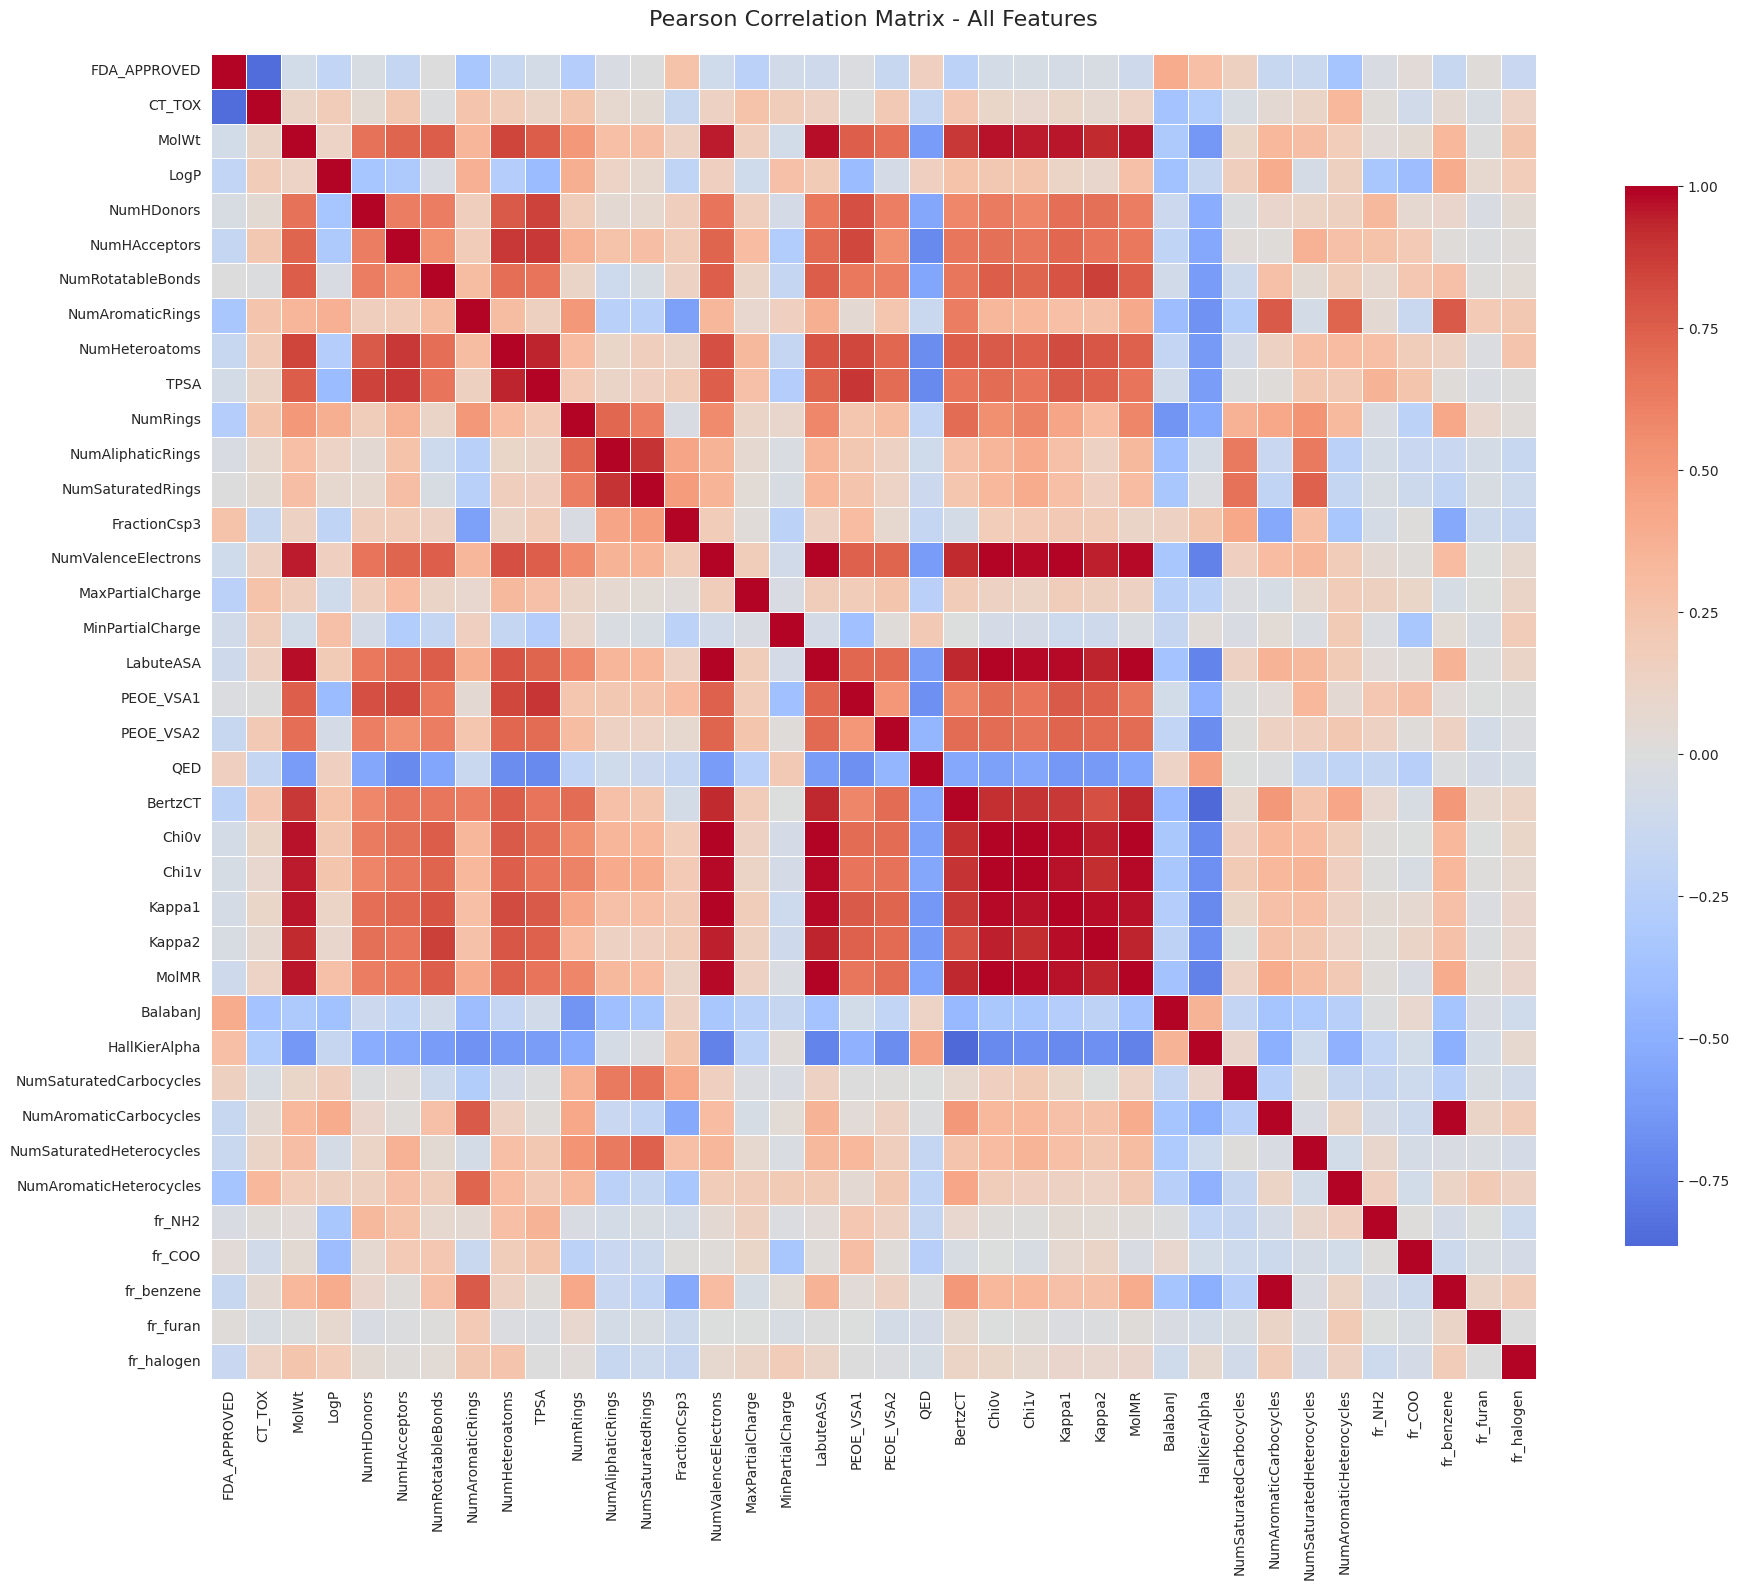

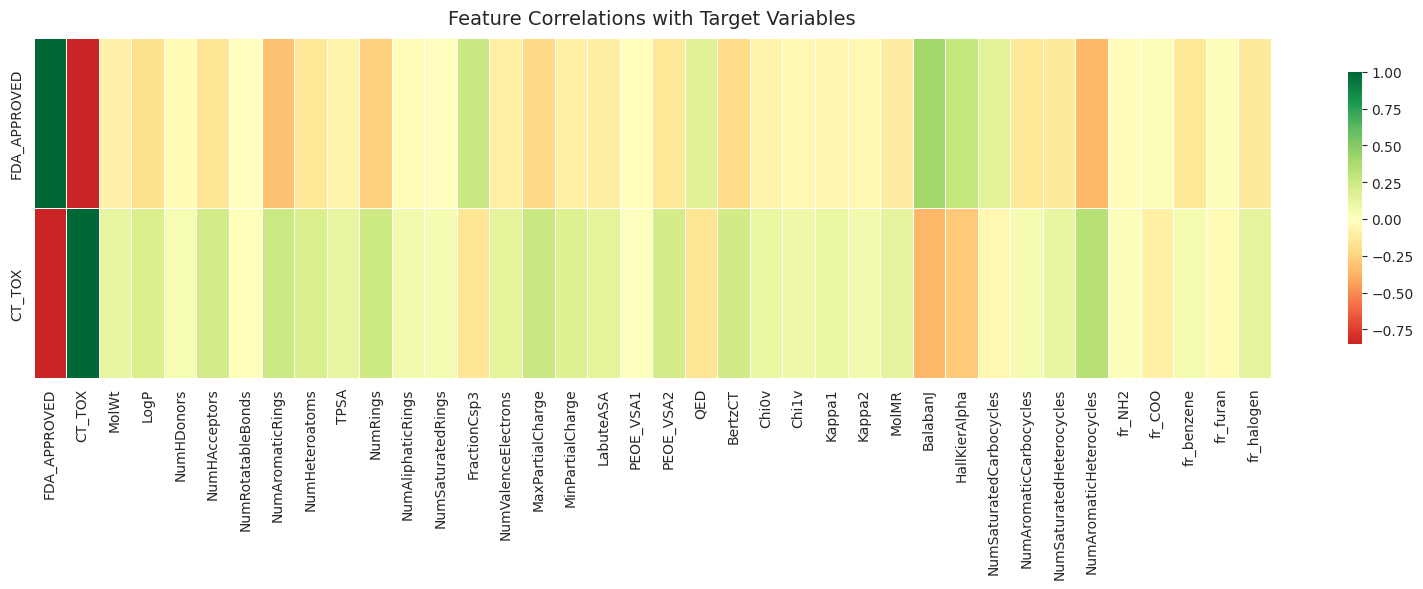

In [6]:
# Step 7: Pearson correlation matrix with threshold of 0.5
print("="*80)
print("CORRELATION ANALYSIS (Threshold: 0.5)")
print("="*80)

# Drop non-numeric columns (SMILES strings) before computing correlation
df_numeric = df_labeled.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Correlations with target variables
target_corr_fda = correlation_matrix['FDA_APPROVED'].sort_values(ascending=False)
target_corr_tox = correlation_matrix['CT_TOX'].sort_values(ascending=False)

print("\nTop 10 features correlated with FDA_APPROVED:")
print(target_corr_fda[1:11])  # Exclude self-correlation

print("\nTop 10 features correlated with CT_TOX:")
print(target_corr_tox[1:11])

# Find highly correlated feature pairs (>0.5, excluding targets)
feature_cols = [col for col in df_numeric.columns if col not in ['FDA_APPROVED', 'CT_TOX']]
high_corr_pairs = []

for i in range(len(feature_cols)):
    for j in range(i+1, len(feature_cols)):
        corr_val = correlation_matrix.loc[feature_cols[i], feature_cols[j]]
        if abs(corr_val) > 0.5:
            high_corr_pairs.append((feature_cols[i], feature_cols[j], corr_val))

print(f"\n{'='*80}")
print(f"HIGHLY CORRELATED FEATURE PAIRS (|r| > 0.5): {len(high_corr_pairs)} pairs found")
print(f"{'='*80}")
if len(high_corr_pairs) > 0:
    for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)[:20]:
        print(f"{feat1:30s} <-> {feat2:30s} : {corr:6.3f}")

# Visualize correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            xticklabels=True, yticklabels=True)
plt.title('Pearson Correlation Matrix - All Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Focused heatmap: Targets vs Features
plt.figure(figsize=(16, 6))
target_corr_matrix = correlation_matrix[['FDA_APPROVED', 'CT_TOX']].T
sns.heatmap(target_corr_matrix, cmap='RdYlGn', center=0, annot=False, 
            cbar_kws={"shrink": 0.8}, linewidths=0.5)
plt.title('Feature Correlations with Target Variables', fontsize=14, pad=10)
plt.tight_layout()
plt.show()

## Unlabeled Data

In [7]:
# Load unlabeled data for comparison
print("="*80)
print("LOADING UNLABELED DATA")
print("="*80)

df_unlabeled = pd.read_csv('../../data/raw/enhanced_data/ct_tox/unlabeled_features.csv')
print(f"✓ Unlabeled dataset loaded successfully!")
print(f"Shape: {df_unlabeled.shape}")
print(f"\nFirst few rows:")
df_unlabeled.head()

LOADING UNLABELED DATA
✓ Unlabeled dataset loaded successfully!
Shape: (249453, 40)

First few rows:


,smiles,canonical_smiles,MolWt,LogP,NumHDonors,NumHAcceptors,NumRotatableBonds,NumAromaticRings,NumHeteroatoms,TPSA,...,NumAromaticCarbocycles,NumSaturatedHeterocycles,NumAromaticHeterocycles,fr_NH2,fr_COO,fr_benzene,fr_furan,fr_halogen,FDA_APPROVED,CT_TOX
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1\n,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1,325.383,5.05060,1.0,2.0,3.0,3.0,4.0,42.24,...,2.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,NaN,NaN
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1\n,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1,285.395,3.11370,1.0,5.0,3.0,2.0,5.0,55.63,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,382.463,4.96778,0.0,3.0,5.0,3.0,4.0,53.33,...,3.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,NaN,NaN
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,409.530,4.00022,0.0,5.0,4.0,2.0,6.0,64.43,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,413.910,3.60956,1.0,6.0,4.0,1.0,8.0,112.10,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN


In [8]:
# Compare labeled vs unlabeled datasets
print("="*80)
print("LABELED vs UNLABELED DATA COMPARISON")
print("="*80)

print(f"\nLabeled data:   {df_labeled.shape[0]} molecules, {df_labeled.shape[1]} columns")
print(f"Unlabeled data: {df_unlabeled.shape[0]} molecules, {df_unlabeled.shape[1]} columns")

# Check if columns match
labeled_cols = set(df_labeled.columns)
unlabeled_cols = set(df_unlabeled.columns)

common_cols = labeled_cols & unlabeled_cols
only_labeled = labeled_cols - unlabeled_cols
only_unlabeled = unlabeled_cols - labeled_cols

print(f"\nCommon features: {len(common_cols)}")
print(f"Only in labeled: {only_labeled}")
print(f"Only in unlabeled: {only_unlabeled}")

# Check for missing values in unlabeled data
print("\n" + "="*80)
print("MISSING VALUES IN UNLABELED DATA")
print("="*80)

missing_unlabeled = df_unlabeled.isnull().sum()
missing_unlabeled_df = pd.DataFrame({
    'Missing_Count': missing_unlabeled,
    'Percentage': (missing_unlabeled / len(df_unlabeled)) * 100
})
missing_unlabeled_df = missing_unlabeled_df[missing_unlabeled_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_unlabeled_df) > 0:
    print(missing_unlabeled_df)
else:
    print("✓ No missing values in feature columns!")

LABELED vs UNLABELED DATA COMPARISON

Labeled data:   222 molecules, 40 columns
Unlabeled data: 249453 molecules, 40 columns

Common features: 40
Only in labeled: set()
Only in unlabeled: set()

MISSING VALUES IN UNLABELED DATA
              Missing_Count  Percentage
FDA_APPROVED         249453       100.0
CT_TOX               249453       100.0


In [9]:
# Compare feature distributions between labeled and unlabeled data
print("="*80)
print("FEATURE DISTRIBUTION COMPARISON")
print("="*80)

# Select key molecular features for comparison
key_features = ['MolWt', 'LogP', 'TPSA', 'NumHDonors', 'NumHAcceptors', 
                'NumRotatableBonds', 'NumAromaticRings', 'QED']

# Drop SMILES columns for statistical comparison
df_labeled_features = df_labeled.drop(columns=['smiles', 'canonical_smiles', 'FDA_APPROVED', 'CT_TOX'], errors='ignore')
df_unlabeled_features = df_unlabeled.drop(columns=['smiles', 'canonical_smiles', 'FDA_APPROVED', 'CT_TOX'], errors='ignore')

print("\nSummary Statistics Comparison:")
print("\n--- LABELED DATA ---")
print(df_labeled_features[key_features].describe().T)
print("\n--- UNLABELED DATA ---")
print(df_unlabeled_features[key_features].describe().T)

FEATURE DISTRIBUTION COMPARISON

Summary Statistics Comparison:

--- LABELED DATA ---
                   count        mean         std        min         25%  \
MolWt              222.0  409.332495  230.403410  75.067000  273.275250   
LogP               222.0    1.814318    3.023466 -11.291400    0.273350   
TPSA               222.0  101.527252   77.599258   0.000000   53.917500   
NumHDonors         222.0    2.432432    2.699494   0.000000    1.000000   
NumHAcceptors      222.0    5.671171    3.606803   0.000000    3.000000   
NumRotatableBonds  222.0    5.801802    5.490955   0.000000    2.000000   
NumAromaticRings   222.0    1.720721    1.288102   0.000000    1.000000   
QED                222.0    0.521527    0.229376   0.010267    0.367874   

                          50%         75%          max  
MolWt              364.871500  481.014000  1882.332000  
LogP                 2.397350    3.553950    12.605800  
TPSA                83.465000  130.635000   548.990000  
NumHDonors

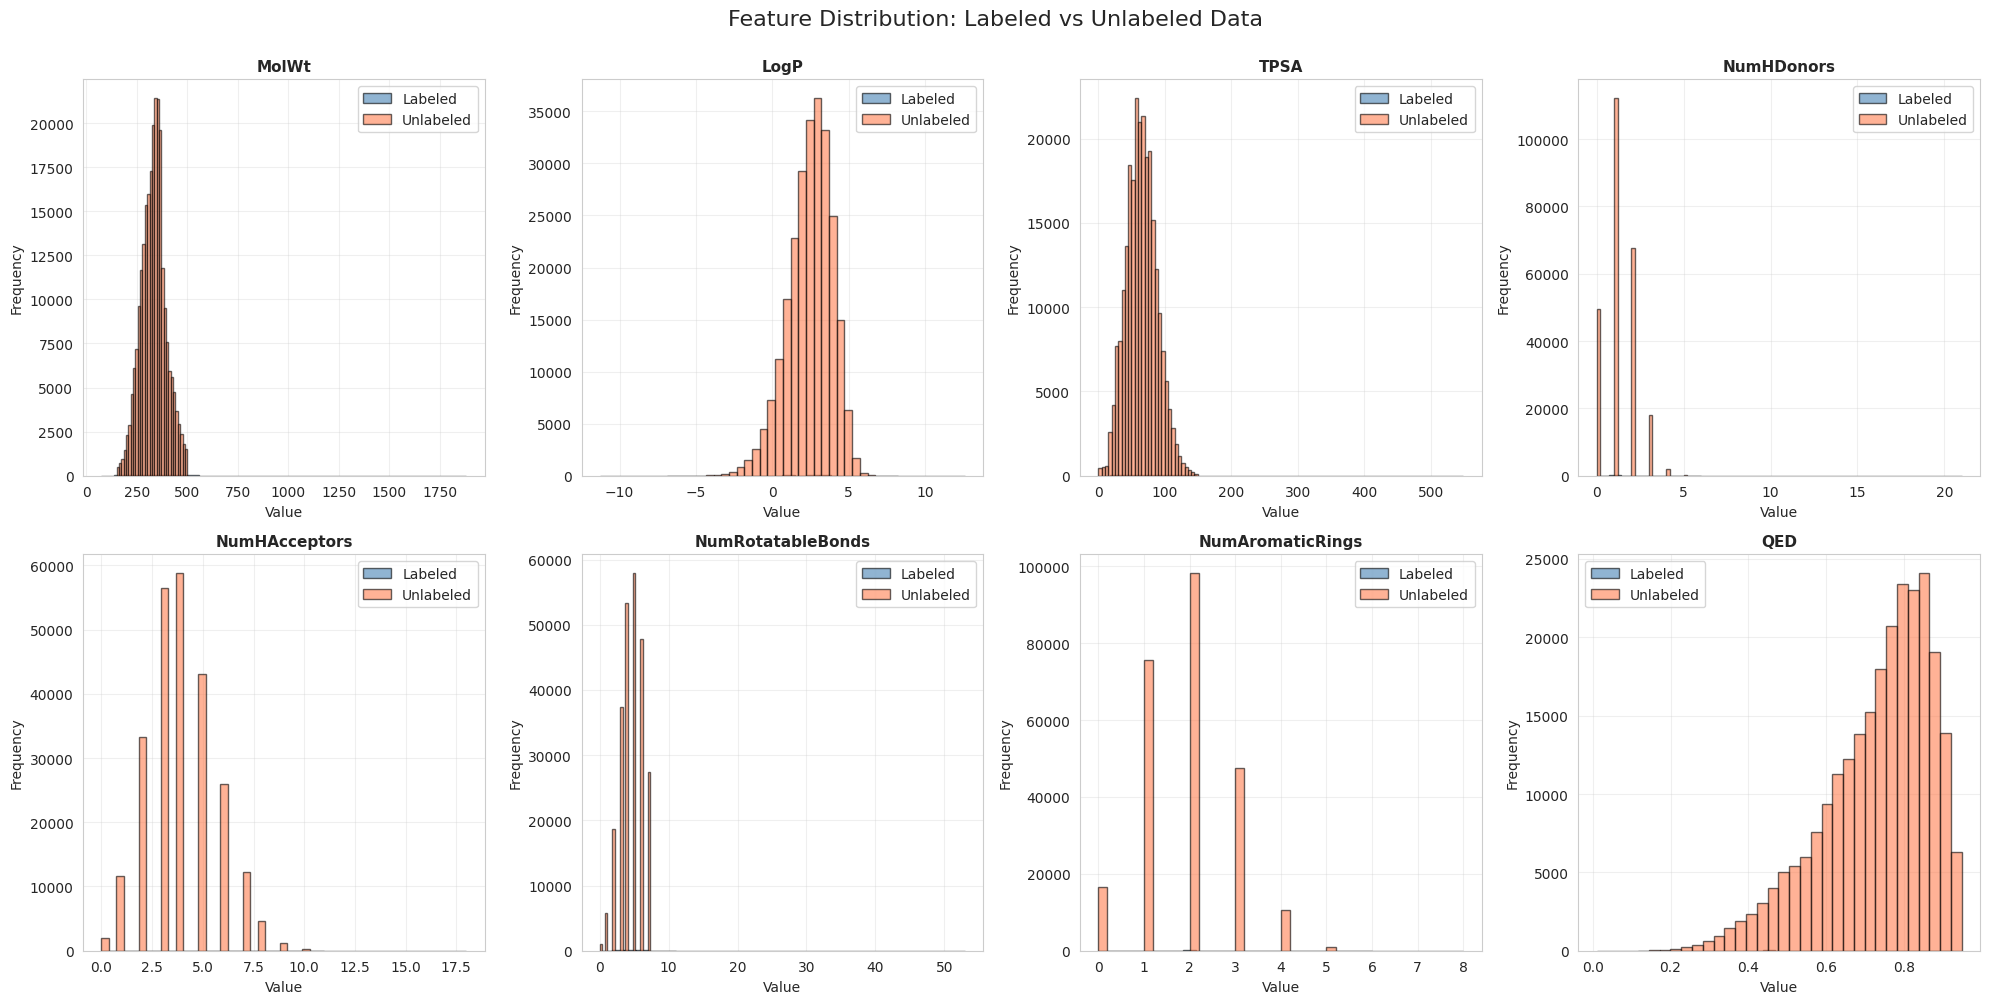

In [10]:
# Visualize distribution comparison for key features
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    # Plot both distributions on same axis
    axes[idx].hist(df_labeled[feature], bins=30, alpha=0.6, label='Labeled', color='steelblue', edgecolor='black')
    axes[idx].hist(df_unlabeled[feature], bins=30, alpha=0.6, label='Unlabeled', color='coral', edgecolor='black')
    axes[idx].set_title(f'{feature}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.suptitle('Feature Distribution: Labeled vs Unlabeled Data', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

In [11]:
# Statistical tests to check if distributions are similar
from scipy.stats import ks_2samp

print("="*80)
print("STATISTICAL COMPARISON (Kolmogorov-Smirnov Test)")
print("="*80)
print("Null Hypothesis: The two distributions are identical")
print("If p-value < 0.05, distributions are significantly different\n")

comparison_results = []

for feature in key_features:
    # Perform KS test
    statistic, p_value = ks_2samp(df_labeled[feature].dropna(), df_unlabeled[feature].dropna())
    
    comparison_results.append({
        'Feature': feature,
        'KS_Statistic': statistic,
        'P_Value': p_value,
        'Significant_Diff': 'YES' if p_value < 0.05 else 'NO'
    })

comparison_df = pd.DataFrame(comparison_results)
print(comparison_df.to_string(index=False))

print("\n" + "="*80)
print("INTERPRETATION:")
print("="*80)
significant_diffs = comparison_df[comparison_df['Significant_Diff'] == 'YES']
if len(significant_diffs) > 0:
    print(f"{len(significant_diffs)} features show significant distribution differences")
    print(f"Features: {', '.join(significant_diffs['Feature'].tolist())}")
    print("This may affect model generalization on unlabeled data!")
else:
    print("✓ No significant distribution differences found")
    print("Labeled and unlabeled data come from similar distributions")

STATISTICAL COMPARISON (Kolmogorov-Smirnov Test)
Null Hypothesis: The two distributions are identical
If p-value < 0.05, distributions are significantly different

          Feature  KS_Statistic      P_Value Significant_Diff
            MolWt      0.290950 3.862306e-17              YES
             LogP      0.185116 3.931915e-07              YES
             TPSA      0.340986 1.528052e-23              YES
       NumHDonors      0.279532 7.828957e-16              YES
    NumHAcceptors      0.273314 3.816928e-15              YES
NumRotatableBonds      0.243151 4.853692e-12              YES
 NumAromaticRings      0.127048 1.391594e-03              YES
              QED      0.439539 1.459596e-39              YES

INTERPRETATION:
8 features show significant distribution differences
Features: MolWt, LogP, TPSA, NumHDonors, NumHAcceptors, NumRotatableBonds, NumAromaticRings, QED
This may affect model generalization on unlabeled data!


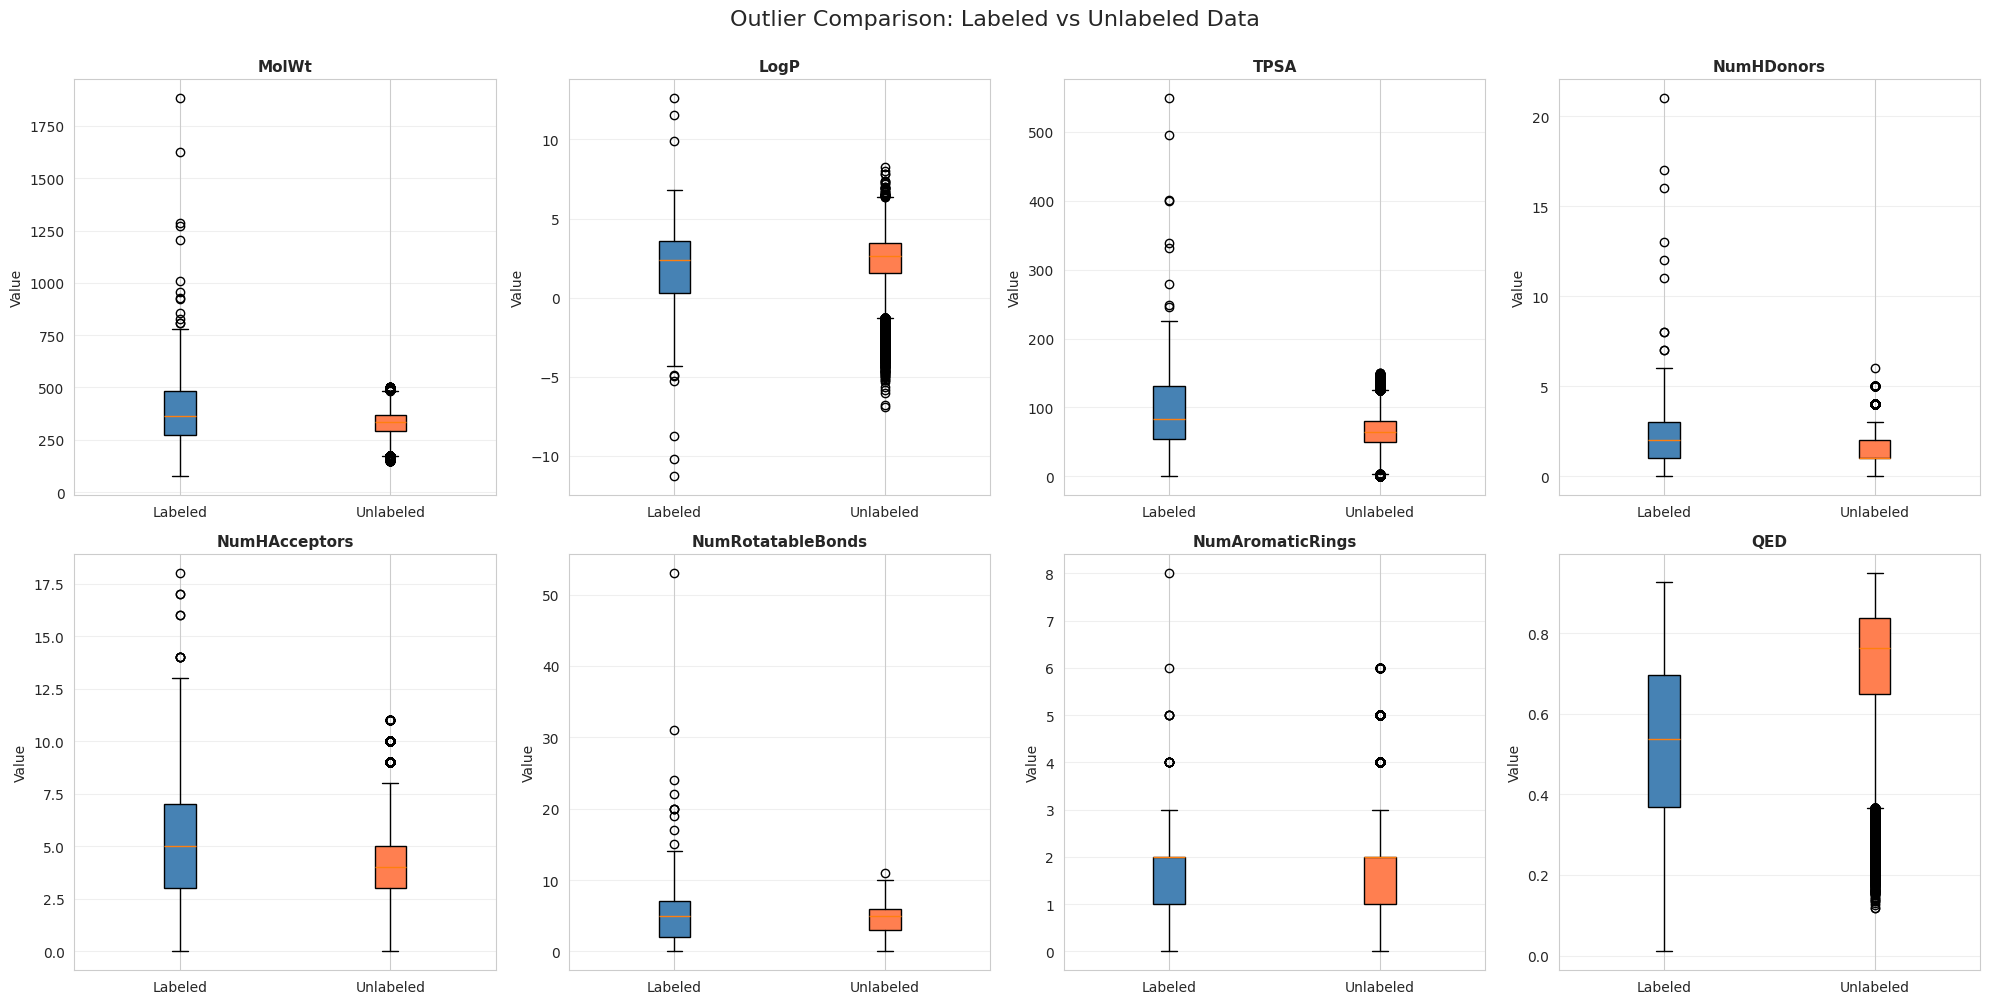

In [12]:
# Box plots for outlier comparison
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    data_to_plot = [df_labeled[feature].dropna(), df_unlabeled[feature].dropna()]
    bp = axes[idx].boxplot(data_to_plot, labels=['Labeled', 'Unlabeled'], patch_artist=True)
    
    # Color the boxes
    bp['boxes'][0].set_facecolor('steelblue')
    bp['boxes'][1].set_facecolor('coral')
    
    axes[idx].set_title(f'{feature}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(alpha=0.3, axis='y')

plt.suptitle('Outlier Comparison: Labeled vs Unlabeled Data', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

DRUG-LIKENESS COMPARISON

QED (Quantitative Estimate of Drug-likeness):
Labeled   - Mean: 0.522, Std: 0.229
Unlabeled - Mean: 0.732, Std: 0.139

Lipinski's Rule of Five Compliance:
Labeled:   158/222 (71.2%)
Unlabeled: 245429/249453 (98.4%)


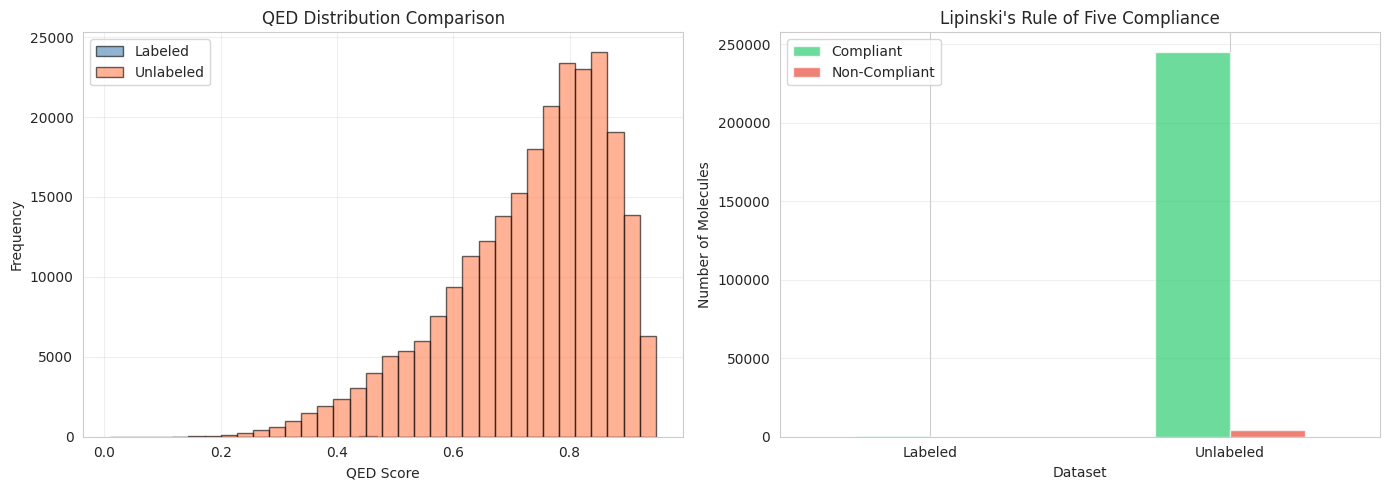

In [13]:
# Check chemical diversity using QED and other drug-likeness metrics
print("="*80)
print("DRUG-LIKENESS COMPARISON")
print("="*80)

# QED Distribution
print("\nQED (Quantitative Estimate of Drug-likeness):")
print(f"Labeled   - Mean: {df_labeled['QED'].mean():.3f}, Std: {df_labeled['QED'].std():.3f}")
print(f"Unlabeled - Mean: {df_unlabeled['QED'].mean():.3f}, Std: {df_unlabeled['QED'].std():.3f}")

# Lipinski's Rule of Five compliance
def check_lipinski(row):
    return (row['MolWt'] <= 500 and 
            row['LogP'] <= 5 and 
            row['NumHDonors'] <= 5 and 
            row['NumHAcceptors'] <= 10)

df_labeled['Lipinski_Compliant'] = df_labeled.apply(check_lipinski, axis=1)
df_unlabeled['Lipinski_Compliant'] = df_unlabeled.apply(check_lipinski, axis=1)

labeled_compliant = df_labeled['Lipinski_Compliant'].sum()
unlabeled_compliant = df_unlabeled['Lipinski_Compliant'].sum()

print(f"\nLipinski's Rule of Five Compliance:")
print(f"Labeled:   {labeled_compliant}/{len(df_labeled)} ({labeled_compliant/len(df_labeled)*100:.1f}%)")
print(f"Unlabeled: {unlabeled_compliant}/{len(df_unlabeled)} ({unlabeled_compliant/len(df_unlabeled)*100:.1f}%)")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# QED comparison
axes[0].hist(df_labeled['QED'], bins=30, alpha=0.6, label='Labeled', color='steelblue', edgecolor='black')
axes[0].hist(df_unlabeled['QED'], bins=30, alpha=0.6, label='Unlabeled', color='coral', edgecolor='black')
axes[0].set_xlabel('QED Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('QED Distribution Comparison')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Lipinski compliance
lipinski_data = pd.DataFrame({
    'Dataset': ['Labeled', 'Unlabeled'],
    'Compliant': [labeled_compliant, unlabeled_compliant],
    'Non-Compliant': [len(df_labeled) - labeled_compliant, len(df_unlabeled) - unlabeled_compliant]
})

lipinski_data.set_index('Dataset').plot(kind='bar', stacked=False, ax=axes[1], 
                                         color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[1].set_ylabel('Number of Molecules')
axes[1].set_title("Lipinski's Rule of Five Compliance")
axes[1].set_xticklabels(['Labeled', 'Unlabeled'], rotation=0)
axes[1].legend(['Compliant', 'Non-Compliant'])
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [14]:
# Summary statistics comparison table
print("="*80)
print("COMPLETE DATASET SUMMARY")
print("="*80)

summary_stats = pd.DataFrame({
    'Metric': [
        'Total Molecules',
        'Total Features',
        'Missing Values',
        'Mean Molecular Weight',
        'Mean LogP',
        'Mean TPSA',
        'Mean QED',
        'Lipinski Compliant (%)',
        'Mean Aromatic Rings'
    ],
    'Labeled': [
        len(df_labeled),
        len(df_labeled.columns) - 4,  # Exclude smiles, canonical_smiles, and targets
        df_labeled.isnull().sum().sum(),
        f"{df_labeled['MolWt'].mean():.2f}",
        f"{df_labeled['LogP'].mean():.2f}",
        f"{df_labeled['TPSA'].mean():.2f}",
        f"{df_labeled['QED'].mean():.3f}",
        f"{labeled_compliant/len(df_labeled)*100:.1f}%",
        f"{df_labeled['NumAromaticRings'].mean():.2f}"
    ],
    'Unlabeled': [
        len(df_unlabeled),
        len(df_unlabeled.columns) - 4,
        df_unlabeled.isnull().sum().sum(),
        f"{df_unlabeled['MolWt'].mean():.2f}",
        f"{df_unlabeled['LogP'].mean():.2f}",
        f"{df_unlabeled['TPSA'].mean():.2f}",
        f"{df_unlabeled['QED'].mean():.3f}",
        f"{unlabeled_compliant/len(df_unlabeled)*100:.1f}%",
        f"{df_unlabeled['NumAromaticRings'].mean():.2f}"
    ]
})

print(summary_stats.to_string(index=False))

print("\n✓ Unlabeled data analysis completed!")

COMPLETE DATASET SUMMARY
                Metric Labeled Unlabeled
       Total Molecules     222    249453
        Total Features      37        37
        Missing Values       0    498906
 Mean Molecular Weight  409.33    332.14
             Mean LogP    1.81      2.46
             Mean TPSA  101.53     64.82
              Mean QED   0.522     0.732
Lipinski Compliant (%)   71.2%     98.4%
   Mean Aromatic Rings    1.72      1.85

✓ Unlabeled data analysis completed!


## Data Processing

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import joblib
import json

print("="*80)
print("DATA PREPROCESSING FOR SEMI-SUPERVISED LEARNING")
print("="*80)

# Load data
df_labeled = pd.read_csv('../../data/raw/enhanced_data/ct_tox/labeled_features.csv')
df_unlabeled = pd.read_csv('../../data/raw/enhanced_data/ct_tox/unlabeled_features.csv')

print(f"\nLoaded {len(df_labeled)} labeled molecules")
print(f"Loaded {len(df_unlabeled)} unlabeled molecules")

DATA PREPROCESSING FOR SEMI-SUPERVISED LEARNING

Loaded 222 labeled molecules
Loaded 249453 unlabeled molecules


In [16]:
# Step 1: Keep ALL Features
print("\n" + "="*80)
print("STEP 1: FEATURE SELECTION - KEEPING ALL FEATURES")
print("="*80)

# Identify feature columns (exclude identifiers and targets)
exclude_cols = ['smiles', 'canonical_smiles', 'FDA_APPROVED', 'CT_TOX']
all_features = [col for col in df_labeled.columns if col not in exclude_cols]

print(f"Keeping all {len(all_features)} molecular features:")
for i, feat in enumerate(all_features, 1):
    print(f"  {i:2d}. {feat}")

# Apply to both datasets
X_labeled = df_labeled[all_features]
y_tox = df_labeled['CT_TOX']

X_unlabeled = df_unlabeled[all_features]

print(f"\nLabeled data: {X_labeled.shape}")
print(f"Unlabeled data: {X_unlabeled.shape}")


STEP 1: FEATURE SELECTION - KEEPING ALL FEATURES
Keeping all 36 molecular features:
   1. MolWt
   2. LogP
   3. NumHDonors
   4. NumHAcceptors
   5. NumRotatableBonds
   6. NumAromaticRings
   7. NumHeteroatoms
   8. TPSA
   9. NumRings
  10. NumAliphaticRings
  11. NumSaturatedRings
  12. FractionCsp3
  13. NumValenceElectrons
  14. MaxPartialCharge
  15. MinPartialCharge
  16. LabuteASA
  17. PEOE_VSA1
  18. PEOE_VSA2
  19. QED
  20. BertzCT
  21. Chi0v
  22. Chi1v
  23. Kappa1
  24. Kappa2
  25. MolMR
  26. BalabanJ
  27. HallKierAlpha
  28. NumSaturatedCarbocycles
  29. NumAromaticCarbocycles
  30. NumSaturatedHeterocycles
  31. NumAromaticHeterocycles
  32. fr_NH2
  33. fr_COO
  34. fr_benzene
  35. fr_furan
  36. fr_halogen

Labeled data: (222, 36)
Unlabeled data: (249453, 36)


In [17]:
# Step 2: Handle outliers (CLIPPING)
print("\n" + "="*80)
print("STEP 2: HANDLE OUTLIERS (CLIPPING)")
print("="*80)

def clip_outliers(df, std_threshold=3):
    """Clip outliers using standard deviation method"""
    df_clipped = df.copy()
    outlier_count = 0
    
    for col in df.columns:
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - std_threshold * std
        upper_bound = mean + std_threshold * std
        
        # Count outliers
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        if outliers > 0:
            outlier_count += outliers
            print(f"  {col:20s}: {outliers} outliers clipped")
            df_clipped[col] = df[col].clip(lower_bound, upper_bound)
    
    return df_clipped, outlier_count

X_labeled_clipped, labeled_outliers = clip_outliers(X_labeled, std_threshold=3)
X_unlabeled_clipped, unlabeled_outliers = clip_outliers(X_unlabeled, std_threshold=3)

print(f"\n✓ Total outliers clipped:")
print(f"  Labeled: {labeled_outliers}")
print(f"  Unlabeled: {unlabeled_outliers}")


STEP 2: HANDLE OUTLIERS (CLIPPING)
  MolWt               : 5 outliers clipped
  LogP                : 5 outliers clipped
  NumHDonors          : 6 outliers clipped
  NumHAcceptors       : 3 outliers clipped
  NumRotatableBonds   : 3 outliers clipped
  NumAromaticRings    : 2 outliers clipped
  NumHeteroatoms      : 4 outliers clipped
  TPSA                : 5 outliers clipped
  NumRings            : 4 outliers clipped
  NumAliphaticRings   : 2 outliers clipped
  NumSaturatedRings   : 4 outliers clipped
  NumValenceElectrons : 3 outliers clipped
  MaxPartialCharge    : 1 outliers clipped
  MinPartialCharge    : 6 outliers clipped
  LabuteASA           : 4 outliers clipped
  PEOE_VSA1           : 5 outliers clipped
  PEOE_VSA2           : 4 outliers clipped
  BertzCT             : 2 outliers clipped
  Chi0v               : 4 outliers clipped
  Chi1v               : 3 outliers clipped
  Kappa1              : 5 outliers clipped
  Kappa2              : 7 outliers clipped
  MolMR           

In [18]:
# Step 3: Normalize features using StandardScaler
print("\n" + "="*80)
print("STEP 3: Z-SCORE NORMALIZATION")
print("="*80)

# Fit scaler on labeled data only
scaler = StandardScaler()
scaler.fit(X_labeled_clipped)

# Transform both datasets
X_labeled_scaled = scaler.transform(X_labeled_clipped)
X_unlabeled_scaled = scaler.transform(X_unlabeled_clipped)

# Convert back to DataFrame
X_labeled_scaled_df = pd.DataFrame(
    X_labeled_scaled, 
    columns=X_labeled_clipped.columns,
    index=X_labeled_clipped.index
)

X_unlabeled_scaled_df = pd.DataFrame(
    X_unlabeled_scaled, 
    columns=X_unlabeled_clipped.columns,
    index=X_unlabeled_clipped.index
)

print(f"✓ Normalization completed")
print(f"\nScaled labeled data shape: {X_labeled_scaled_df.shape}")
print(f"Scaled unlabeled data shape: {X_unlabeled_scaled_df.shape}")

# Verify normalization
print("\nSample statistics after scaling (should be ~0 mean, ~1 std):")
print(X_labeled_scaled_df.describe().T[['mean', 'std', 'min', 'max']])


STEP 3: Z-SCORE NORMALIZATION
✓ Normalization completed

Scaled labeled data shape: (222, 36)
Scaled unlabeled data shape: (249453, 36)

Sample statistics after scaling (should be ~0 mean, ~1 std):
                                  mean      std       min       max
MolWt                    -4.800964e-17  1.00226 -1.685747  3.611786
LogP                      1.040209e-16  1.00226 -3.201209  3.181947
NumHDonors                9.201848e-17  1.00226 -1.098499  3.905812
NumHAcceptors            -8.401688e-17  1.00226 -1.588705  3.040483
NumRotatableBonds         1.200241e-16  1.00226 -1.279718  3.795716
NumAromaticRings          1.280257e-16  1.00226 -1.382622  3.138514
NumHeteroatoms           -8.801768e-17  1.00226 -1.730522  3.442199
TPSA                     -1.480297e-16  1.00226 -1.470994  3.485658
NumRings                  1.820366e-16  1.00226 -1.754067  3.095915
NumAliphaticRings         9.351879e-17  1.00226 -0.891731  3.237959
NumSaturatedRings         8.201648e-17  1.00226 -0.75

In [19]:
# Step 4: Add target back to labeled data
print("\n" + "="*80)
print("STEP 4: COMBINE FEATURES WITH TARGET")
print("="*80)

# Add CT_TOX target only
df_labeled_processed = X_labeled_scaled_df.copy()
df_labeled_processed['CT_TOX'] = y_tox.values

df_unlabeled_processed = X_unlabeled_scaled_df.copy()
df_unlabeled_processed['CT_TOX'] = np.nan

print(f"Labeled processed: {df_labeled_processed.shape}")
print(f"Unlabeled processed: {df_unlabeled_processed.shape}")

# Display sample
print("\nSample of processed labeled data:")
print(df_labeled_processed.head())


STEP 4: COMBINE FEATURES WITH TARGET
Labeled processed: (222, 37)
Unlabeled processed: (249453, 37)

Sample of processed labeled data:
      MolWt      LogP  NumHDonors  NumHAcceptors  NumRotatableBonds  \
0  0.222655 -0.697011    2.703116       1.218296           1.454564   
1 -0.217141 -0.380541    0.327107       0.656895           0.087423   
2 -1.685747 -1.711304   -0.623297      -1.027305          -1.051861   
3 -0.129134 -1.416122   -0.623297       0.376195          -0.140434   
4  3.134828 -2.169998    3.905812       2.341096           2.593848   

   NumAromaticRings  NumHeteroatoms      TPSA  NumRings  NumAliphaticRings  \
0          0.236399        0.487202  0.948288 -0.035787          -0.221396   
1         -0.573111        0.487202  0.351251 -0.608547          -0.221396   
2         -1.382622       -1.065205 -0.466247 -1.754067          -0.891731   
3         -0.573111        0.265430  0.451473 -0.035787           0.448939   
4         -0.573111        3.442199  3.485658 -

In [20]:
# Step 5: Save processed data
print("\n" + "="*80)
print("STEP 5: SAVE PROCESSED DATA")
print("="*80)

# Save processed datasets
df_labeled_processed.to_csv('../../data/processed/ct_tox/labeled_processed.csv', index=False)
df_unlabeled_processed.to_csv('../../data/processed/ct_tox/unlabeled_processed.csv', index=False)

# Save scaler for later use
joblib.dump(scaler, '../../data/processed/ct_tox/scaler.pkl')

# Save feature information
feature_info = {
    'feature_names': all_features,
    'n_features': len(all_features),
    'target_variable': 'CT_TOX',
    'selection_method': 'all_features_included',
    'scaling_method': 'StandardScaler',
    'outlier_handling': 'clipping_3std',
    'feature_categories': {
        'basic_properties': ['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors', 'NumRotatableBonds', 'NumAromaticRings'],
        'lipinski': ['NumHeteroatoms', 'TPSA'],
        'structural': ['NumRings', 'NumAliphaticRings', 'NumSaturatedRings', 'FractionCsp3'],
        'topological': ['BertzCT', 'Chi0v', 'Chi1v', 'Kappa1', 'Kappa2', 'BalabanJ', 'HallKierAlpha'],
        'electronic': ['NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge'],
        'surface': ['LabuteASA', 'PEOE_VSA1', 'PEOE_VSA2'],
        'druglikeness': ['QED', 'MolMR'],
        'pharmacophore': ['fr_NH2', 'fr_COO', 'fr_benzene', 'fr_furan', 'fr_halogen']
    }
}

with open('../../data/processed/ct_tox/feature_info.json', 'w') as f:
    json.dump(feature_info, f, indent=2)

print("✓ Saved: labeled_processed.csv")
print("✓ Saved: unlabeled_processed.csv")
print("✓ Saved: scaler.pkl")
print("✓ Saved: feature_info.json")

print("\n" + "="*80)
print("DATA PREPROCESSING COMPLETED!")
print("="*80)
print(f"\nFinal dataset ready for semi-supervised learning:")
print(f"  • {len(df_labeled_processed)} labeled molecules")
print(f"  • {len(df_unlabeled_processed)} unlabeled molecules")
print(f"  • {len(all_features)} molecular features (ALL features included)")
print(f"  • 1 target variable: CT_TOX (Clinical Toxicity)")
print(f"\nFiles saved to: data/processed/ct_tox/")
print(f"\nNext step: Train semi-supervised models for toxicity prediction!")


STEP 5: SAVE PROCESSED DATA
✓ Saved: labeled_processed.csv
✓ Saved: unlabeled_processed.csv
✓ Saved: scaler.pkl
✓ Saved: feature_info.json

DATA PREPROCESSING COMPLETED!

Final dataset ready for semi-supervised learning:
  • 222 labeled molecules
  • 249453 unlabeled molecules
  • 36 molecular features (ALL features included)
  • 1 target variable: CT_TOX (Clinical Toxicity)

Files saved to: data/processed/ct_tox/

Next step: Train semi-supervised models for toxicity prediction!
